In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
# more info on callbakcs: https://keras.io/callbacks/ model saver is cool too.
from keras.callbacks import TensorBoard
import pickle
import time
import numpy as np

from IPython.display import Image

# Remove warnings
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [18]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)


In [19]:
X = X/255.0

y = np.array(y)

dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, y,
                      batch_size=32,
                      epochs=10,
                      validation_split=0.3,
                      callbacks=[tensorboard])

model.save('Chart-Recognition-64x3-CNN.model')

3-conv-64-nodes-0-dense-1665239732
Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.6871 - accuracy: 0.5455 - val_loss: 0.7822 - val_accuracy: 0.4000
Epoch 2/10
1/1 [==============================] - 0s 455ms/step - loss: 0.6889 - accuracy: 0.5455 - val_loss: 0.7209 - val_accuracy: 0.4000
Epoch 3/10
1/1 [==============================] - 0s 422ms/step - loss: 0.6684 - accuracy: 0.5455 - val_loss: 0.6929 - val_accuracy: 0.4000
Epoch 4/10
1/1 [==============================] - 0s 491ms/step - loss: 0.6650 - accuracy: 0.7273 - val_loss: 0.6895 - val_accuracy: 0.4000
Epoch 5/10
1/1 [==============================] - 0s 484ms/step - loss: 0.6527 - accuracy: 0.7273 - val_loss: 0.7034 - val_accuracy: 0.4000
Epoch 6/10
1/1 [==============================] - 0s 446ms/step - loss: 0.6366 - accuracy: 0.5455 - val_loss: 0.7221 - val_accuracy: 0.4000
Epoch 7/10
1/1 [==============================] - 1s 528ms/step - loss: 0.6234 - accuracy: 0.5455 - val_loss: 0.7064 - val_accur

INFO:tensorflow:Assets written to: Chart-Recognition-64x3-CNN.model/assets


INFO:tensorflow:Assets written to: Chart-Recognition-64x3-CNN.model/assets


In [20]:
# Run the comando on Linux Terminal:

# tensorboard --logdir="logs/"

# Tenson Board will provide you a local host address such as:

# http://localhost:6006/ 

# Open this at your browser to access Tensor Board charts 

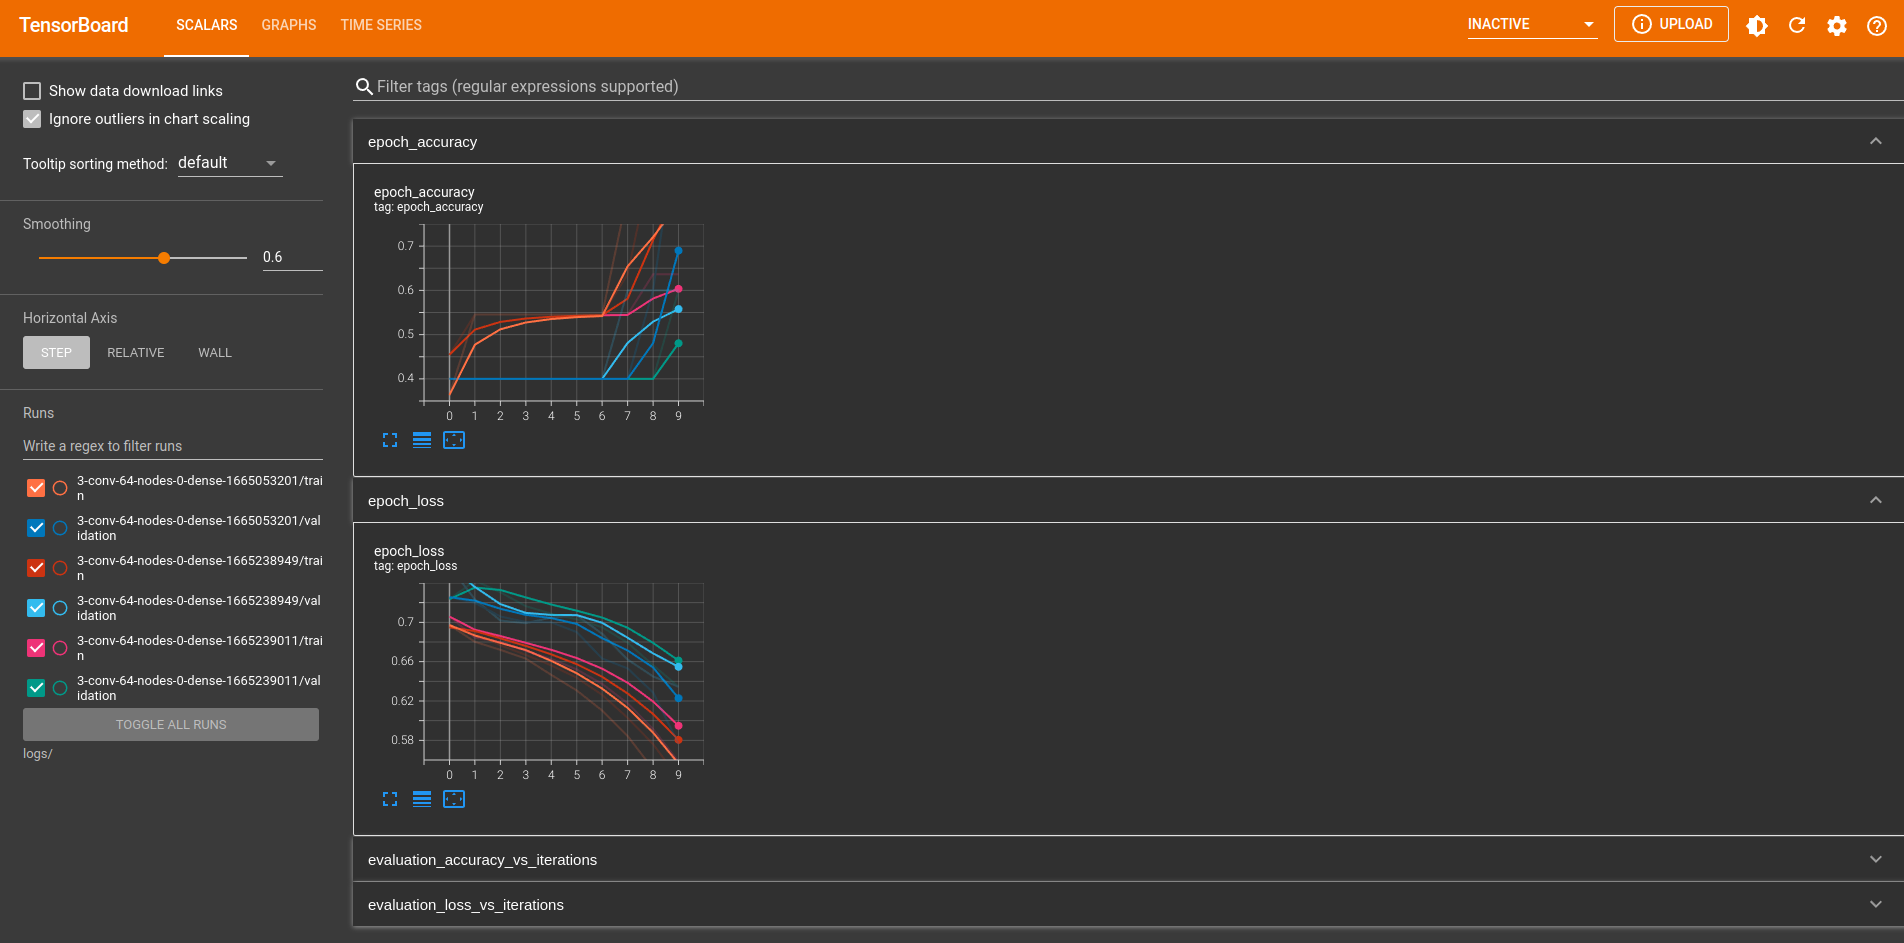

In [21]:
Image(filename="Tensor Board Example.png") 